In [83]:
import numpy
import pandas
import sklearn.model_selection
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import BallTree, KDTree
from sklearn.utils import shuffle
from metric_learn import LMNN
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report


In [84]:
def map_class(class_name):
    if class_name == 'Iris-setosa':
        return 0
    if class_name == 'Iris-virginica':
        return 1
    if class_name == 'Iris-versicolor':
        return 2

In [85]:

def map_color(x):
    if x==0:
        return '#FFAAAA'
    if x==1:
        return '#AAFFAA'
    return '#AAAAFF'

def map_color_bold(x):
    if x==0:
        return '#FF0000'
    if x==1:
        return '#00FF00'
    return '#0000FF'

def map_edge_colors(x):
    if x==0:
        return '#D01B1B'
    if x==1:
        return '#51D01B'
    return '#1B93D0'

In [135]:
iris_data = load_iris()
#print(iris_data.target_names)
data = iris_data
#print (data)
X = iris_data['data']
#print (data.feature_names)
Y = iris_data['target']
X = numpy.delete(X, 3, 1)
X = numpy.delete(X, 1, 1)
M=numpy.append(X,Y[:,None],1)
M = shuffle(M)
#print (X)
train_to_test_ratio = 0.7
split_idx = (int)(train_to_test_ratio*len(X))
X = M[:, 0:2]
Y = M[:, 2:]

X_train = X[:split_idx]
X_test = X[split_idx:]
Y_train = Y[:split_idx]
Y_test = Y[split_idx:]
print(type(X_train))
#lmnn = LMNN(k=1, learn_rate=1e-6)
#lmnn.fit(X_train, Y_train)
#params = lmnn.metric()

<class 'numpy.ndarray'>


In [120]:
cmap_light = ListedColormap(['#FFAAAF', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [132]:
#knn = KNeighborsClassifier(n_neighbors=1, metric='mahalanobis', metric_params={"V": params})
#knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier(n_neighbors=1, metric='mahalanobis', metric_params={"V": numpy.cov(X_train.T)})
knn.fit(X_train, Y_train)
Y_predicted = knn.predict(X_test)
print(sklearn.metrics.accuracy_score(Y_test, Y_predicted))
print(sklearn.metrics.classification_report(Y_test, Y_predicted))

0.955555555556
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        15
        1.0       0.92      1.00      0.96        22
        2.0       1.00      0.75      0.86         8

avg / total       0.96      0.96      0.95        45



/home/grzegorz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


4.3 7.9


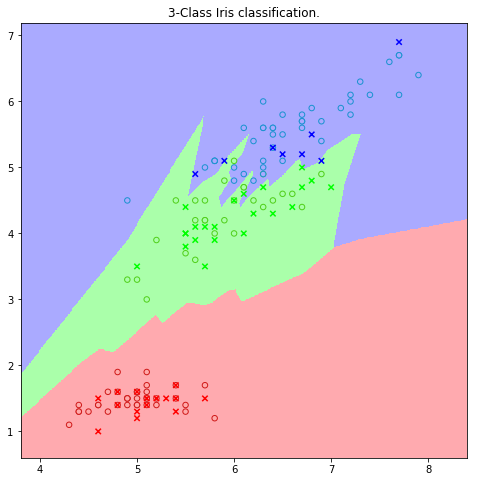

In [133]:
sepal_width = X_train[:, 0]
x_min, x_max = sepal_width.min(), sepal_width.max()
x_min, x_max
print (x_min, x_max)
petal_width = X_train[:, 1]
y_min, y_max = petal_width.min(), petal_width.max()
h = 0.01
xx, yy = numpy.meshgrid(
    numpy.arange(x_min-0.5, x_max+0.5, h), 
    numpy.arange(y_min-0.5, y_max+0.5, h))
Z = knn.predict(numpy.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

col = numpy.apply_along_axis(map_color, 1, Y_train)
col_test = numpy.apply_along_axis(map_color_bold, 1, Y_test)
edge_colors = numpy.apply_along_axis(map_edge_colors, 1, Y_train)
Y_train[:,:1]

plt.scatter(sepal_width, petal_width, c=col, marker='o', s=30, alpha=1,
            edgecolors=edge_colors, linewidths=1) # plot train data
plt.scatter(X_test[:, 0], X_test[:, 1], c=col_test, marker='x', s=30, edgecolors='black') # plot test data

plt.title("3-Class Iris classification.")

plt.show()